# Exploring and Preparing Data

## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` , `Seaborn` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [36]:
#other menthods to change the legends seems to be not working for me so i acessed the legend after it was created and modified it in each plot
new_labels = ['Unsucessful Landing', 'Sucessful Landing']

### Visualize the relationship between Flight Number and Payload Mass

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


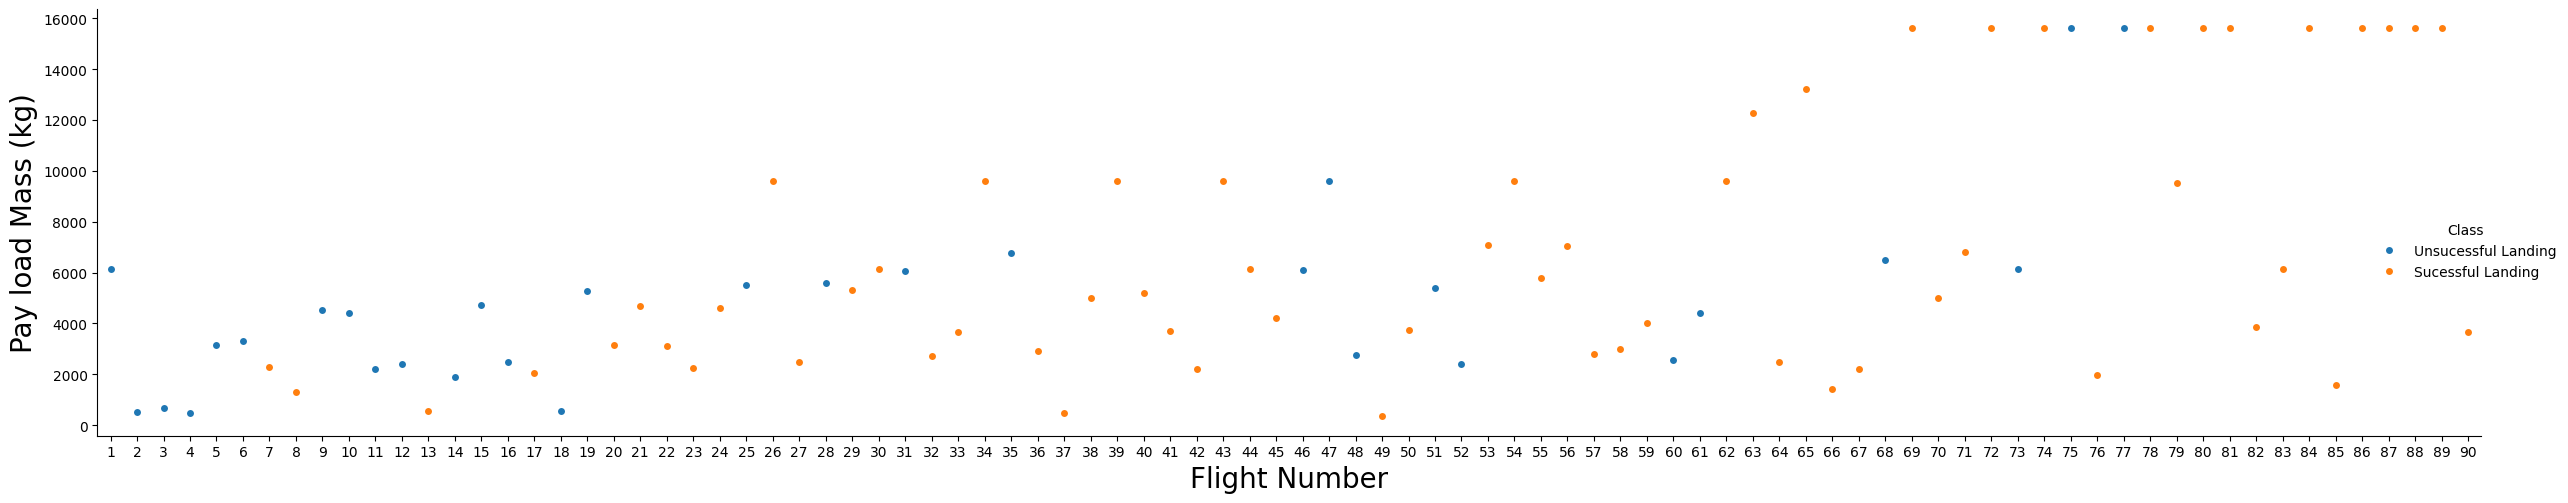

In [37]:
ax = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

###  Visualize the relationship between Flight Number and Launch Site

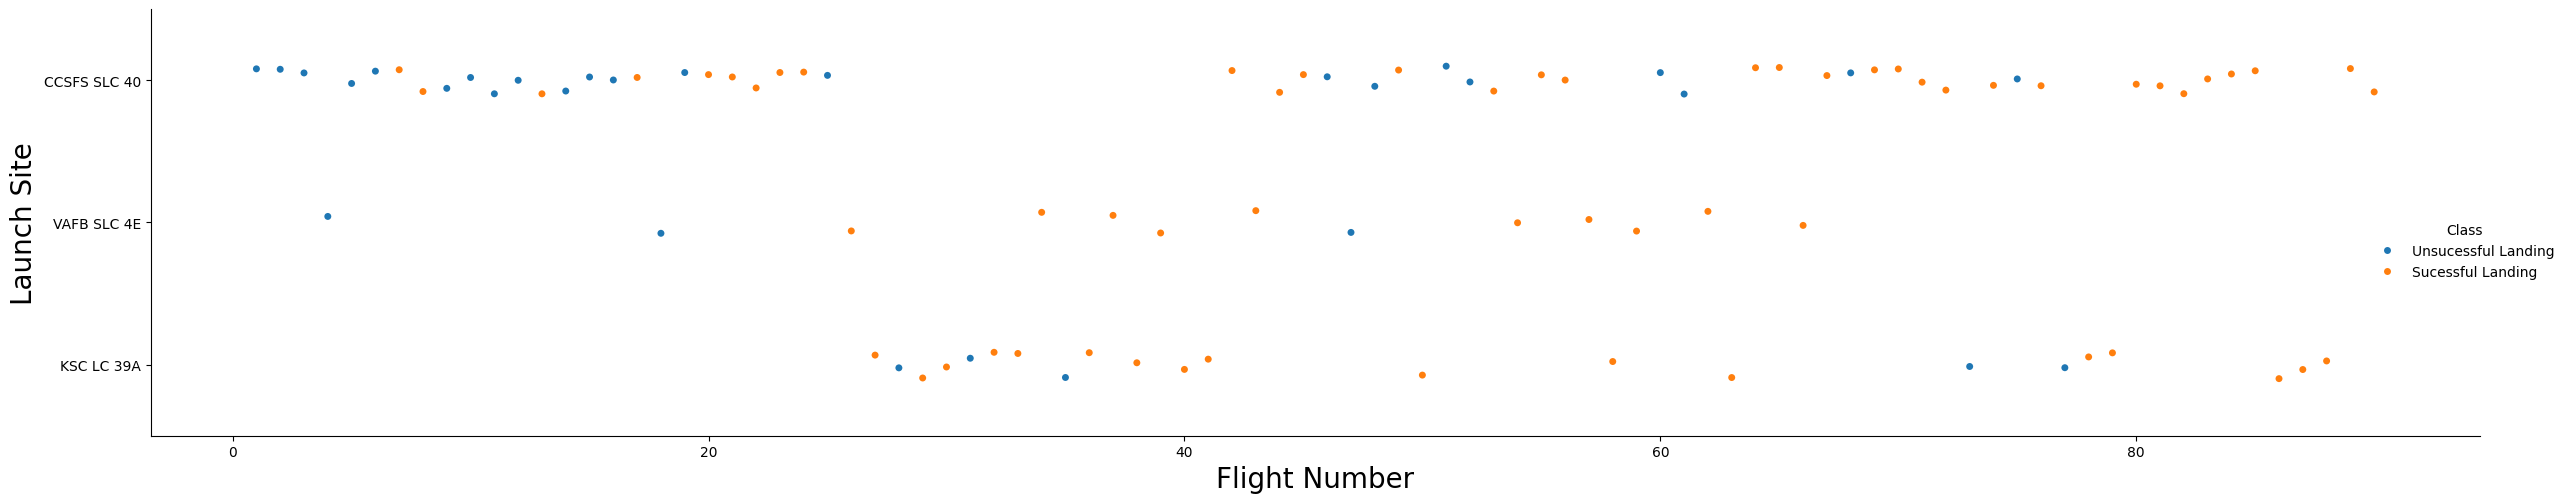

In [56]:
ax = sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)


plt.show()

### Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


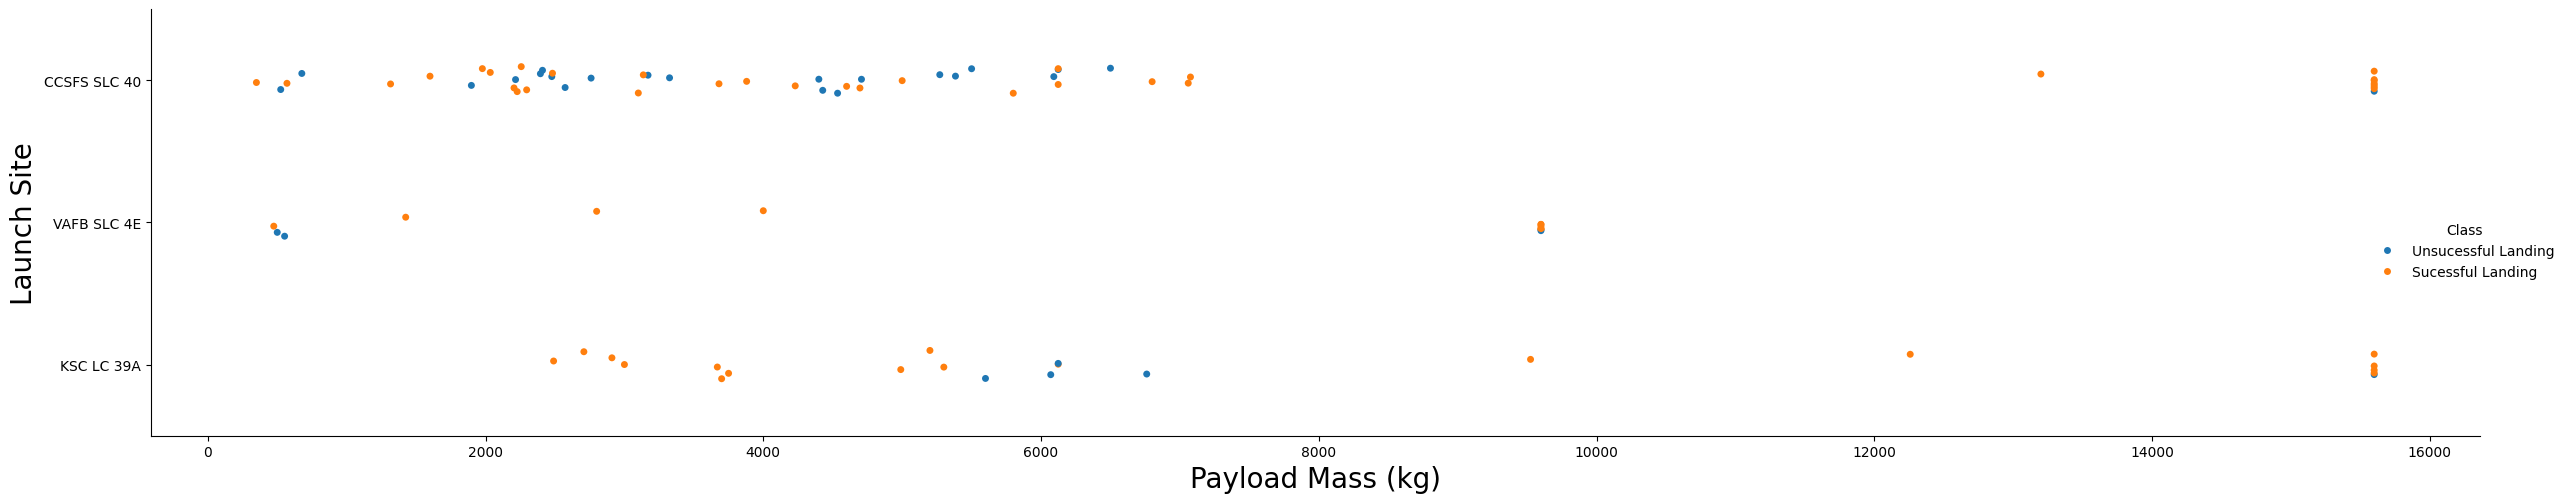

In [39]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
ax = sns.catplot(x="PayloadMass",y="LaunchSite",data=df,hue="Class",aspect=5)
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
plt.xlabel("Payload Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


###  Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.

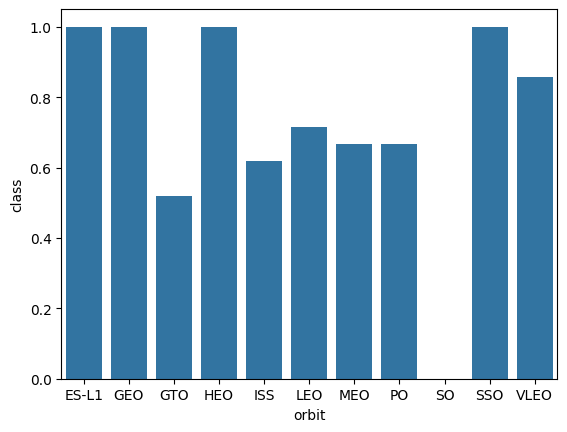

In [41]:
orbit_success = df.groupby("Orbit").mean()
orbit_success.reset_index(inplace=True)
sns.barplot(x="Orbit",y="Class",data=orbit_success,)
plt.xlabel("orbit")
plt.ylabel("class")
plt.show()

We can see that <code>ES-L1</code> , <code>GEO</code> , <code>HEO</code> and <code>SSO</code> has more Sucess Rate

### Visualize the relationship between FlightNumber and Orbit type


Next For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


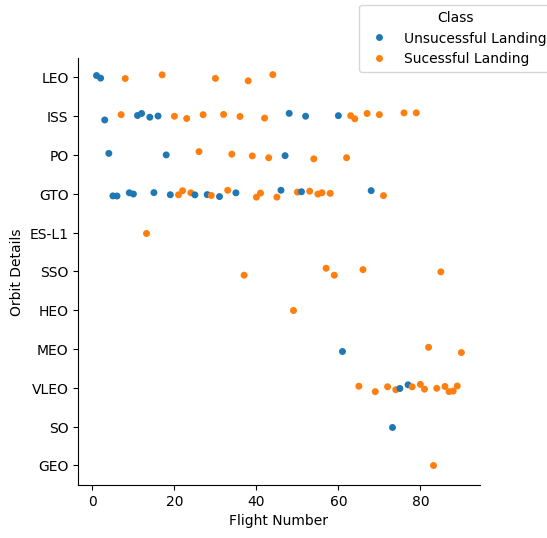

In [50]:
ax = sns.catplot(x='FlightNumber',y='Orbit',data=df,hue='Class')
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
plt.xlabel('Flight Number')
plt.ylabel('Orbit Details')
ax._legend.set_title('Class')
ax._legend.set_frame_on(True) 
ax._legend.set_bbox_to_anchor((1, 1))
plt.show()

we can see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


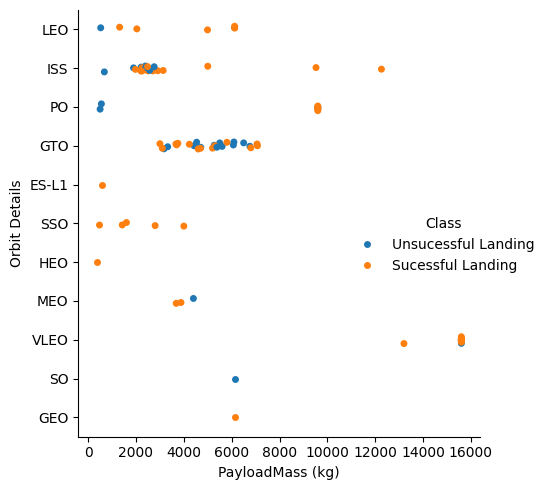

In [52]:
ax =sns.catplot(x="PayloadMass",y='Orbit',data=df,hue='Class')
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)
plt.xlabel('PayloadMass (kg)')
plt.ylabel('Orbit Details')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### Visualize the launch success yearly trend

We can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


In [53]:
#extracting year from dates
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


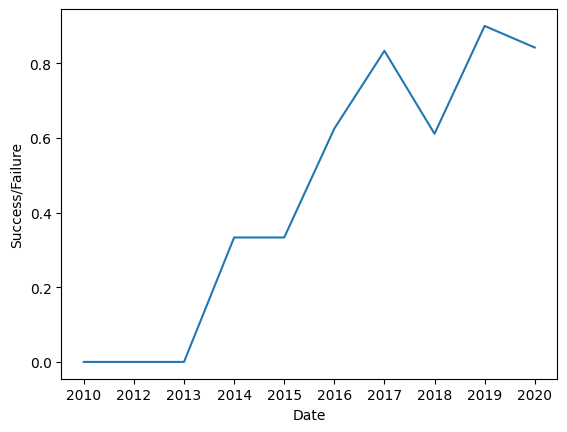

In [54]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
average_by_year = df.groupby("Date").mean()
average_by_year.reset_index(inplace=True)
plt.plot(average_by_year["Date"],average_by_year["Class"])
plt.xlabel("Date")
plt.ylabel("Success/Failure")
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

## Features Engineering

By now, we obtained some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [57]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


####  Create dummy variables to categorical columns

In [58]:
features_one_hot=pd.get_dummies(features, columns=['Orbit','LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head(5)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

In [59]:
features_one_hot = features_one_hot.astype('float64')

We can now export it to a <b>CSV</b> for the next section

In [61]:
features_one_hot.to_csv("dataset_part_3.csv",index =False)